In [2]:
#%pip install transformers

In [2]:
import torch
torch.cuda.is_available()

False

In [3]:
from transformers import GPTNeoXForCausalLM, AutoTokenizer




In [4]:
model = GPTNeoXForCausalLM.from_pretrained(
  "EleutherAI/pythia-410m-deduped",
  cache_dir="./data/pythia-410m-deduped/default",
)




In [5]:
tokenizer = AutoTokenizer.from_pretrained(
  "EleutherAI/pythia-410m-deduped",
  cache_dir="./data/pythia-410m-deduped/default",
)



In [6]:
inputs = tokenizer("operation is a word that means", return_tensors="pt")
tokens = model.generate(**inputs)
tokenizer.decode(tokens[0])

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
c:\Users\StephenPrior\source\repos\annotate-transformer\.venv\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'operation is a word that means "to be in the midst of."\n\nThe word is used'

In [7]:
model

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 1024)
    (layers): ModuleList(
      (0): GPTNeoXLayer(
        (input_layernorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attention): GPTNeoXAttention(
          (rotary_emb): RotaryEmbedding()
          (query_key_value): Linear(in_features=1024, out_features=3072, bias=True)
          (dense): Linear(in_features=1024, out_features=1024, bias=True)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=1024, out_features=4096, bias=True)
          (dense_4h_to_h): Linear(in_features=4096, out_features=1024, bias=True)
          (act): GELUActivation()
        )
      )
      (1): GPTNeoXLayer(
        (input_layernorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)

In [8]:
model.gpt_neox.embed_in

Embedding(50304, 1024)

In [9]:
tokens

tensor([[20936,   310,   247,  3159,   326,  2097,   346,   936,   320,   275,
           253, 22654,   273,   449,   187,   187,   510,  3159,   310,   908]])

In [10]:
embedding = model.gpt_neox.embed_in.forward(tokens[0])
embedding.shape

torch.Size([20, 1024])

In [11]:
%matplotlib inline


In [12]:
import matplotlib.pyplot as plt
import matplotlib

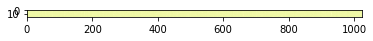

In [13]:
X=embedding.detach().cpu().numpy()
slNorm = matplotlib.colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=X.min(), vmax=X.max())
plt.imshow(X,"Spectral",norm=slNorm)

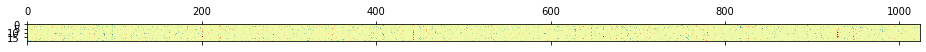

In [14]:
plt.matshow(X,cmap="Spectral", norm=slNorm)

In [15]:
model.gpt_neox.layers

ModuleList(
  (0): GPTNeoXLayer(
    (input_layernorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (post_attention_layernorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (attention): GPTNeoXAttention(
      (rotary_emb): RotaryEmbedding()
      (query_key_value): Linear(in_features=1024, out_features=3072, bias=True)
      (dense): Linear(in_features=1024, out_features=1024, bias=True)
    )
    (mlp): GPTNeoXMLP(
      (dense_h_to_4h): Linear(in_features=1024, out_features=4096, bias=True)
      (dense_4h_to_h): Linear(in_features=4096, out_features=1024, bias=True)
      (act): GELUActivation()
    )
  )
  (1): GPTNeoXLayer(
    (input_layernorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (post_attention_layernorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (attention): GPTNeoXAttention(
      (rotary_emb): RotaryEmbedding()
      (query_key_value): Linear(in_features=1024, out_features=3072, bias=True)
      (dense): 

In [16]:
model.gpt_neox.layers[0]

GPTNeoXLayer(
  (input_layernorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (post_attention_layernorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (attention): GPTNeoXAttention(
    (rotary_emb): RotaryEmbedding()
    (query_key_value): Linear(in_features=1024, out_features=3072, bias=True)
    (dense): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (mlp): GPTNeoXMLP(
    (dense_h_to_4h): Linear(in_features=1024, out_features=4096, bias=True)
    (dense_4h_to_h): Linear(in_features=4096, out_features=1024, bias=True)
    (act): GELUActivation()
  )
)

In [17]:
model.gpt_neox.layers[0].mlp.dense_h_to_4h

Linear(in_features=1024, out_features=4096, bias=True)

In [18]:
model.gpt_neox.layers[0].mlp.dense_h_to_4h.weight

Parameter containing:
tensor([[ 0.0068, -0.0008, -0.0427,  ..., -0.0148,  0.0287, -0.0089],
        [ 0.0094,  0.0091, -0.0094,  ..., -0.0113,  0.0159, -0.0237],
        [ 0.0096,  0.0278,  0.0132,  ...,  0.0215, -0.0175, -0.0071],
        ...,
        [ 0.0336,  0.0091, -0.0003,  ..., -0.0198, -0.0133, -0.0178],
        [ 0.0398,  0.0084,  0.0341,  ..., -0.0323,  0.0152,  0.0386],
        [ 0.0054, -0.0019,  0.0188,  ...,  0.0105, -0.0429,  0.0017]],
       requires_grad=True)

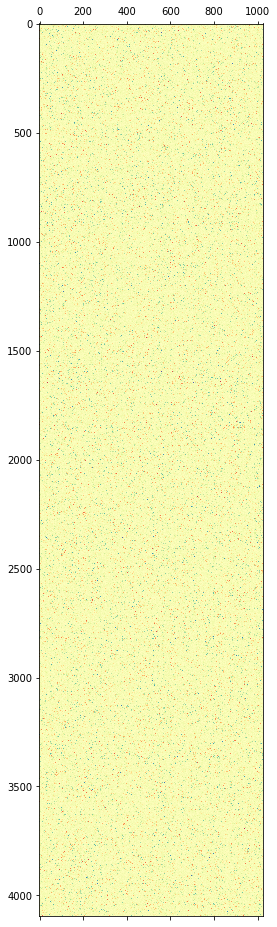

In [19]:
w =model.gpt_neox.layers[0].mlp.dense_h_to_4h.weight.detach().cpu().numpy()
slNorm = matplotlib.colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=w.min(), vmax=w.max())
plt.matshow(w,cmap="Spectral", norm=slNorm)

In [20]:
#process manually
embedding[0].shape, embedding[0]

(torch.Size([1024]),
 tensor([ 0.0297,  0.0021, -0.0264,  ...,  0.0095,  0.0057, -0.0109],
        grad_fn=<SelectBackward>))

Generate tokens normally

In [51]:
config = model.generation_config 
config.max_new_tokens = 1
inputs = tokenizer("The capital of Ireland is", return_tensors="pt")
tokens = model.generate(**inputs,generation_config=config)
tokens[0], tokenizer.decode(tokens[0])

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


(tensor([  510,  5347,   273, 11011,   310, 24523]),
 'The capital of Ireland is Dublin')

Last token is 24523 - Dublin

Generate tokens the hard way

In [33]:
inputs = tokenizer("The capital of Ireland is", return_tensors="pt")

embeds = model.gpt_neox.embed_in(inputs.input_ids)

transformer_outputs = model.gpt_neox.forward(inputs_embeds=embeds)
residuals = transformer_outputs[0]
lm_logits = model.embed_out(residuals)

logit_tensor = lm_logits[0].detach().cpu().numpy()
lm_logits[0].shape

torch.Size([5, 50304])

In [53]:
logit_tensor.min(), logit_tensor.max(), logit_tensor[4].argmax(), logit_tensor[4][w[4].argmax()]

(-10.082936, 18.289526, 24523, 6.1005793)

In [54]:
tokenizer.decode(logit_tensor[4].argmax())

' Dublin'

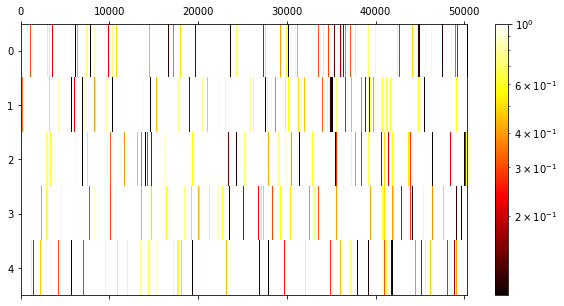

: 

In [57]:
#10 by 5 inches
fig, ax = plt.subplots(figsize=(10, 5))
#Log normalization to make the largest values stand out
lNorm = matplotlib.colors.LogNorm(vmin=1,vmax=w.max())
#slNorm = matplotlib.colors.Logit(linthresh=0.03, linscale=0.03, vmin=w.min(), vmax=w.max())

# Plot a heatmap of the embedding vectors
im = ax.matshow(logit_tensor, cmap='hot', norm=lNorm)

# Set the aspect ratio to 'auto'
ax.set_aspect('auto')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
plt.show()